# Исследование объявлений о продаже квартир


------------------------------------------------------------------------------------

Цель: найти интересные особенности и зависимости, которые существуют на рынке недвижимости. Установить параметры, которые позволят построить автоматизированную систему

Входные данные — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет.

План работы:
1. Рассмотреть данные
2. Провести их преодобработку
3. Добавить в таблицу необходимые столбцы
4. Провести исследовательский анализ данных
5. Сделать вывод

## Этап 1. Обзор данных





In [ ]:
import pandas as pd

data = pd.read_csv ('/datasets/real_estate_data.csv', sep='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

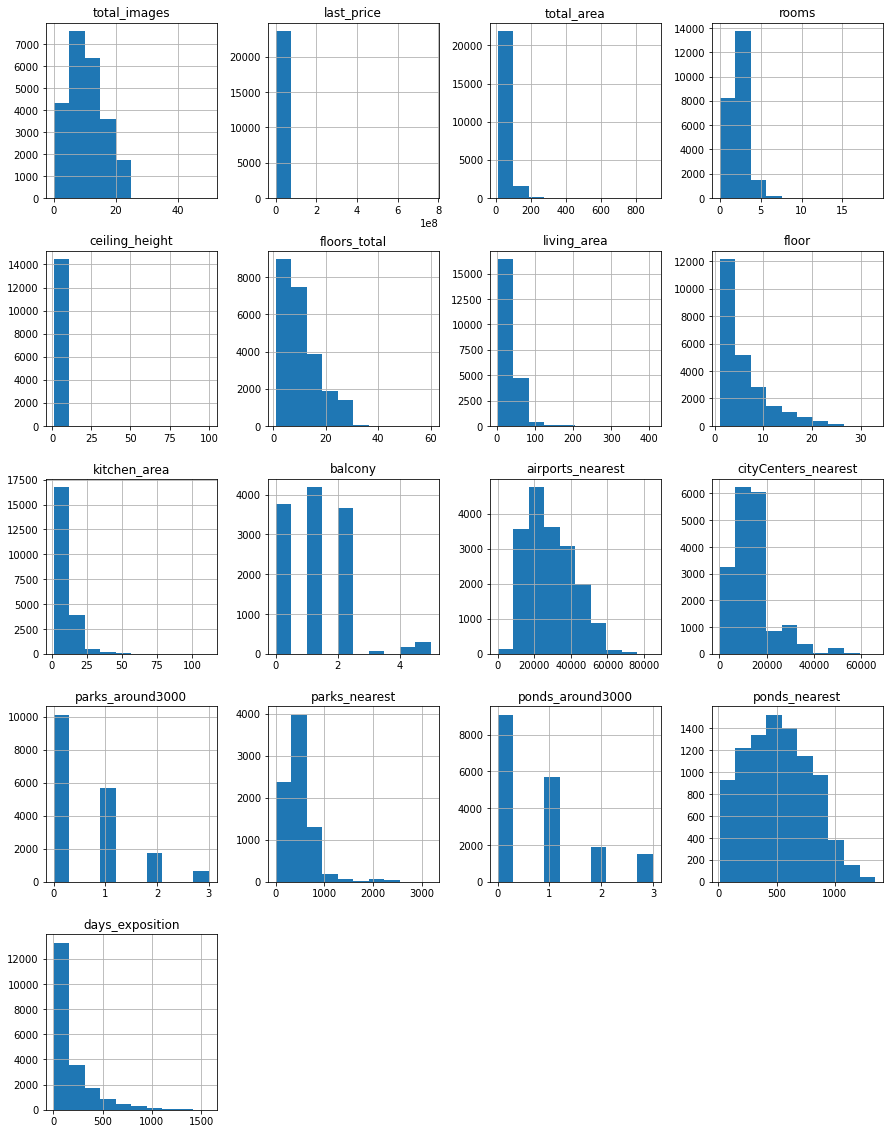

In [ ]:
data.hist(figsize=(15, 20))

## Этап 2. Предобработка данных

1. Определим, в каких столбцах есть пропуски и их количество.

In [ ]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Предложим логичную замену для пропусков. Сделать это можно для данных о высоте потолков и количестве балконов. Высоту потолков можно заменить медианным значением, а пропуски в количестве балконов можно заменить на 0.

Для остальных данных предложить логическую замену не получится.

In [ ]:
ceiling_height_median = data['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna(ceiling_height_median)

data['balcony'] = data['balcony'].fillna(0)
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

К пропускам в данных могло привести то, что при заполнении объявлений не была указана вся информация. Данные, с пропущенными значениями, не являются обязательными, поэтому многие их могут пропустить.
Также могли намеренно скрыть информацию.

2. Рассмотрим типы данных и исправим на нужные при необходимости.

In [ ]:
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

In [ ]:
data['first_day_exposition'] = data['first_day_exposition'].astype('datetime64')
data['day'] = data['first_day_exposition'].dt.weekday 
data['month'] = data['first_day_exposition'].dt.month 
data['year'] = data['first_day_exposition'].dt.year

data['last_price'] = data['last_price'].astype('int64')
data['is_apartment'] = data['is_apartment'].astype('bool')
data.dtypes

total_images                     int64
last_price                       int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                        float64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
day                              int64
month                            int64
year                             int64
dtype: object

first_day_exposition является датой, поэтому следовало изменить его значение.

is_apartment имеет булев тип, last_price также следовало изменить на целочисленный тип

3. Изучим уникальные значения в столбце с названиями и устраните неявные дубликаты.

In [ ]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [ ]:
# напишем функцию для устранения неявных дубликатов

def replace_names(wrong_names, goog_name): 
    for wrong_name in wrong_names: 
        data['locality_name'] = data['locality_name'].str.replace(wrong_name, goog_name) 

duplicates = ['посёлок городского типа', 'поселок городского типа', 'городской поселок','городской посёлок','деревня','посёлок','коттеджный поселок'] 
name = 'поселок' 
replace_names(duplicates, name)

dupl_murino = ['поселок Мурино', 'посёлок Мурино']
original_murino = 'Мурино'
replace_names(dupl_murino, original_murino)

dupl_kudr = ['поселок Кудрово']
original_kudrovo = 'Кудрово'
replace_names(dupl_kudr, original_kudrovo)

dupl_lub = ['поселок Любань']
original_luban = 'Любань'
replace_names(dupl_lub, original_luban)

dupl_stan = ['поселок станции']
original_stan = 'поселок при железнодорожной станции'
replace_names(dupl_stan, original_stan)


data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'поселок Янино-1',
       'поселок Парголово', 'Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'Кудрово', 'Коммунар', 'Колпино',
       'поселок Красный Бор', 'Гатчина', 'поселок Фёдоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'поселок Новое Девяткино',
       'поселок Металлострой', 'поселок Лебяжье', 'поселок Сиверский',
       'поселок Молодцово', 'поселок Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'поселок Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'поселок Куттузи', 'поселок Аннино',
       'поселок Ефимовский', 'поселок Плодовое', 'поселок Заклинье',
       'поселок Торковичи', 'поселок Первомайское', 'Красное Село',
       'поселок Понтонный', 'Сясьстрой', 'поселок Старая',
       'поселок Лесколово', 'поселок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'п

In [ ]:
data['locality_name'].value_counts()

Санкт-Петербург                    15721
Мурино                               590
Кудрово                              472
поселок Шушары                       440
Всеволожск                           398
                                   ...  
поселок Платформа 69-й километр        1
поселок Цвылёво                        1
поселок Сижно                          1
поселок Дзержинского                   1
поселок Свирьстрой                     1
Name: locality_name, Length: 310, dtype: int64

4. Устранение аномалий

In [ ]:
# изучим данных, обратим внимание на максимальные и минимальные значения
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,day,month,year
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23613.000000,21796.000000,23699.000000,21421.000000,23699.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000,23699.000000,23699.000000,23699.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.724358,10.673824,34.457852,5.892358,10.569807,0.591080,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634,2.569307,6.400101,2017.367146
std,5.682529,1.088701e+07,35.654083,1.078405,0.988298,6.597173,22.030445,4.885249,5.905438,0.959298,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988,1.789082,3.491561,1.039771
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,0.000000,1.000000,2014.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000,1.000000,3.000000,2017.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000,3.000000,6.000000,2017.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.700000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000,4.000000,10.000000,2018.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,6.000000,12.000000,2019.000000


In [ ]:
data = data[data['ceiling_height'] < 4]
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,day,month,year
count,23585.00000,2.358500e+04,23585.000000,23585.000000,23585.000000,23499.000000,21690.000000,23585.000000,21322.000000,23585.000000,18064.000000,18084.000000,18085.000000,8016.000000,18085.000000,9043.000000,20431.000000,23585.000000,23585.000000,23585.000000
mean,9.84859,6.470715e+06,60.089081,2.066865,2.691027,10.694285,34.281704,5.899512,10.542357,0.591054,28806.227690,14225.091186,0.608737,491.100549,0.767100,518.361163,180.477363,2.569472,6.397965,2017.367649
std,5.67096,1.067727e+07,34.884487,1.074118,0.198444,6.596984,21.500827,4.888582,5.842080,0.958800,12642.739572,8593.878802,0.799712,342.998557,0.935991,277.904832,219.343431,1.789821,3.490919,1.039116
min,0.00000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,0.000000,1.000000,2014.000000
25%,6.00000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,18557.000000,9289.000000,0.000000,288.000000,0.000000,294.000000,45.000000,1.000000,3.000000,2017.000000
50%,9.00000,4.620000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26766.000000,13123.000000,0.000000,454.000000,1.000000,502.000000,95.000000,3.000000,6.000000,2017.000000
75%,14.00000,6.750000e+06,69.500000,3.000000,2.700000,16.000000,42.200000,8.000000,12.000000,1.000000,37310.000000,16309.000000,1.000000,612.000000,1.000000,730.000000,231.000000,4.000000,10.000000,2018.000000
max,50.00000,7.630000e+08,900.000000,19.000000,3.980000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,6.000000,12.000000,2019.000000


При рассмотрении максимальных и минимальных элементов видно, что во многих столбцах есть выбросы. Например, в столбцах airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest максимальные значения равны выбросам, но они не повлияют на дальнейший анализ.

Значение в столбце с высотой потолков можно выделить до 4м, так как средняя длина потолков составляет 2,7 м.



**Добавим новые столбцы.**

In [ ]:
# цена одного квадратного метра
data['price_1m'] = data['last_price'] / data['total_area']

Столбцы, которые уже были добавлены:
- день недели публикации объявления - day
- месяц публикации объявления - month
- год публикации объявления - year

In [ ]:
# функция для добавления типа этажа квартиры, добавление нового столбца с типом этажа

def floor_desc(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
    
data['floor_type'] = data.apply(floor_desc, axis = 1)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,day,month,year,price_1m,floor_type
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,...,1.0,482.0,2.0,755.0,NaN,3,3,2019,120370.370370,другой
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,True,...,0.0,NaN,0.0,NaN,81.0,1,12,2018,82920.792079,первый
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,True,...,1.0,90.0,2.0,574.0,558.0,3,8,2015,92785.714286,другой
3,0,64900000,159.0,2015-07-24,3,2.65,14.0,NaN,9,True,...,2.0,84.0,3.0,234.0,424.0,4,7,2015,408176.100629,другой
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,...,2.0,112.0,1.0,48.0,121.0,1,6,2018,100000.000000,другой


In [ ]:
# расстояние до центра города в километрах

data['cityCenters_nearest_km'] = (data['cityCenters_nearest'] / 1000).round()
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,day,month,year,price_1m,floor_type,cityCenters_nearest_km
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.00,8,True,...,482.0,2.0,755.0,NaN,3,3,2019,120370.370370,другой,16.0
1,7,3350000,40.40,2018-12-04,1,2.65,11.0,18.60,1,True,...,NaN,0.0,NaN,81.0,1,12,2018,82920.792079,первый,19.0
2,10,5196000,56.00,2015-08-20,2,2.65,5.0,34.30,4,True,...,90.0,2.0,574.0,558.0,3,8,2015,92785.714286,другой,14.0
3,0,64900000,159.00,2015-07-24,3,2.65,14.0,NaN,9,True,...,84.0,3.0,234.0,424.0,4,7,2015,408176.100629,другой,7.0
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.00,13,True,...,112.0,1.0,48.0,121.0,1,6,2018,100000.000000,другой,8.0
5,10,2890000,30.40,2018-09-10,1,2.65,12.0,14.40,5,True,...,NaN,NaN,NaN,55.0,0,9,2018,95065.789474,другой,NaN
6,6,3700000,37.30,2017-11-02,1,2.65,26.0,10.60,6,True,...,NaN,0.0,NaN,155.0,3,11,2017,99195.710456,другой,19.0
7,5,7915000,71.60,2019-04-18,2,2.65,24.0,NaN,22,True,...,NaN,0.0,NaN,NaN,3,4,2019,110544.692737,другой,12.0
8,20,2900000,33.16,2018-05-23,1,2.65,27.0,15.43,26,True,...,NaN,NaN,NaN,189.0,2,5,2018,87454.764777,другой,NaN
9,18,5400000,61.00,2017-02-26,3,2.50,9.0,43.60,7,True,...,NaN,0.0,NaN,289.0,6,2,2017,88524.590164,другой,15.0


## Этап 3. Исследовательский анализ данных

1. Изучение параметров объектов

Перед построением гистограммы узнаем доверительный интервал для каждого из столбцов с помощью квантилей.

In [ ]:
#общая площадь
data['total_area'].quantile(0.05), data['total_area'].quantile(0.95)

(31.0, 115.26399999999994)

<AxesSubplot:title={'center':'Общая площадь'}, ylabel='Frequency'>

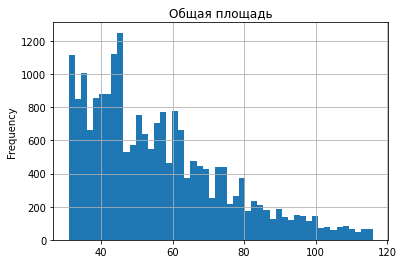

In [ ]:
data['total_area'].plot(kind = 'hist', bins = 50, range = (31,116), title = 'Общая площадь', grid=True)

In [ ]:
#жилая площадь
data['living_area'].quantile(0.05), data['living_area'].quantile(0.95)

(15.2, 68.1)

<AxesSubplot:title={'center':'Жилая площадь'}, ylabel='Frequency'>

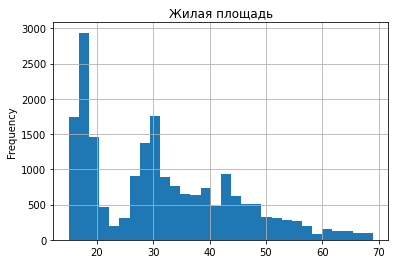

In [ ]:
data['living_area'].plot(kind = 'hist', bins = 30, range = (15, 69), title = 'Жилая площадь', grid=True)

In [ ]:
#площадь кухни
data['kitchen_area'].quantile(0.05), data['kitchen_area'].quantile(0.95)

(5.5, 20.0)

<AxesSubplot:title={'center':'Площадь кухни'}, ylabel='Frequency'>

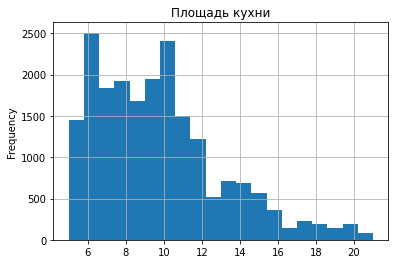

In [ ]:
data['kitchen_area'].plot(kind = 'hist', bins = 20, range = (5,21), title = 'Площадь кухни', grid=True)

Общая площадь находится в диапазоне (31, 116) кв. м. Самое частое - площади до 60 кв.м.
Жилая площадь находится в диапазоне (15, 60) кв. м. Самое частое - площади до 20 кв. м. и 30 кв.м.
Площадь кухни находится в диапазоне (5.5, 20) кв.м. Самое частое - площади от 6 до 11 кв. м.

In [ ]:
#цена объекта
data['last_price'].quantile(0.05), data['last_price'].quantile(0.95)

(1860000.0, 15000000.0)

<AxesSubplot:title={'center':'Цена объекта'}, ylabel='Frequency'>

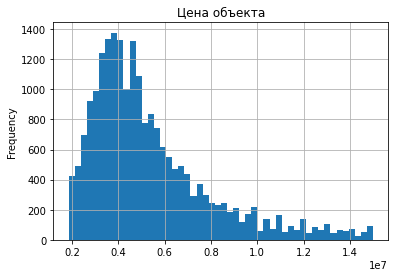

In [ ]:
data['last_price'].plot(kind = 'hist', bins = 50, range = (1860000,15000000), title = 'Цена объекта', grid=True)

Самая частая цена объектов составляет от 3 000 000 до 5 000 000.

In [ ]:
#количество комнат
data['rooms'].quantile(0.05), data['rooms'].quantile(0.95)

(1.0, 4.0)

<AxesSubplot:title={'center':'Количество комнат'}, ylabel='Frequency'>

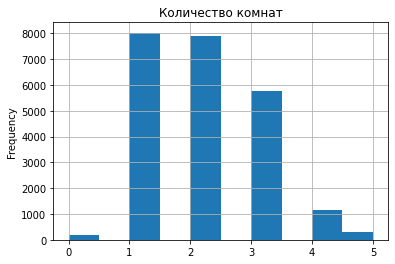

In [ ]:
data['rooms'].plot(kind = 'hist', bins = 10, range = (0,5), title = 'Количество комнат', grid=True)

Больше всего актуальны 1-комнатные и 2-комнатные квартиры.

In [ ]:
#высота потолков
data['ceiling_height'].quantile(0.05), data['ceiling_height'].quantile(0.95)

(2.5, 3.1)

<AxesSubplot:title={'center':'Высота потолков'}, ylabel='Frequency'>

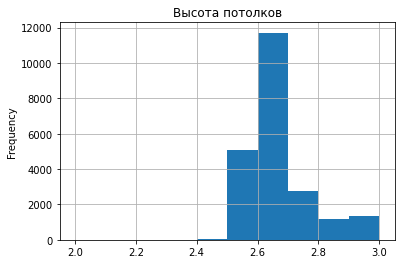

In [ ]:
data['ceiling_height'].plot(kind = 'hist', bins = 10, range = (2,3), title = 'Высота потолков', grid=True)

Средняя высота потолков составляет 2,7м.

In [ ]:
#этаж квартиры
data['floor'].quantile(0.05), data['floor'].quantile(0.95)

(1.0, 16.0)

<AxesSubplot:title={'center':'Этаж квартиры'}, ylabel='Frequency'>

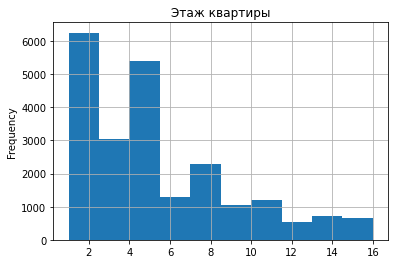

In [ ]:
data['floor'].plot(kind = 'hist', bins = 10, range = (1,16), title = 'Этаж квартиры', grid=True)

Больше всего продается квартир 1,2 и 4 этажах.

In [ ]:
#тип этажа квартиры
types = data['floor_type'].value_counts()
types

другой       17377
последний     3302
первый        2906
Name: floor_type, dtype: int64

<AxesSubplot:title={'center':'Тип этажа квартиры'}, ylabel='floor_type'>

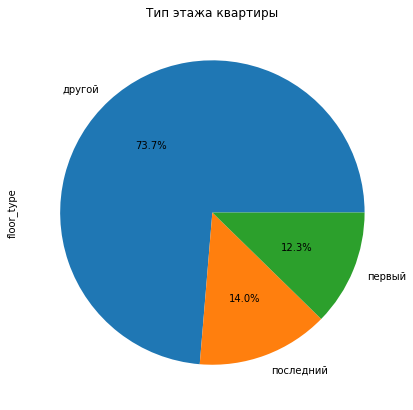

In [ ]:
types.plot(kind = 'pie', title = 'Тип этажа квартиры', figsize=(7,7), autopct='%1.1f%%')

Значительную долю объявлений составляют квартиры не на первом и последнем этажах.

In [ ]:
#общее количество этажей в доме
data['floors_total'].quantile(0.05), data['floors_total'].quantile(0.95)

(4.0, 25.0)

<AxesSubplot:title={'center':'Общее количество этажей в доме'}, ylabel='Frequency'>

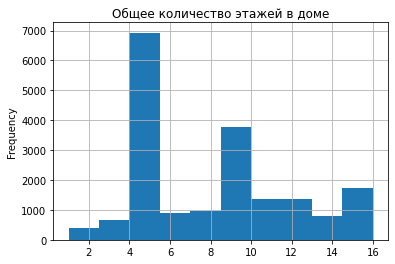

In [ ]:
data['floors_total'].plot(kind = 'hist', bins = 10, range = (1,16), title = 'Общее количество этажей в доме', grid=True)

В большинстве случаев квартиры располагаются на 4 этаже

In [ ]:
#расстояние до центра города в км

data['cityCenters_nearest_km'].quantile(0.05), data['cityCenters_nearest_km'].quantile(0.95)

(4.0, 32.0)

<AxesSubplot:title={'center':'Расстояние до центра города'}, ylabel='Frequency'>

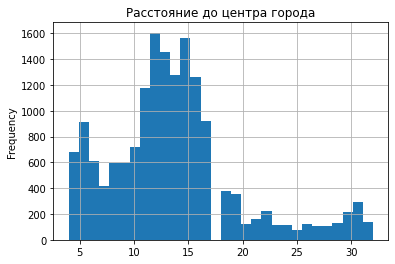

In [ ]:
data['cityCenters_nearest_km'].plot(kind = 'hist', bins = 30, range = (4,32), title = 'Расстояние до центра города', grid=True)

Частая протяженность расстояния до центра город и находится в диапазоне от 10 до 15 км.

In [ ]:
#расстояние до ближайшего аэропорта
data['airports_nearest'].quantile(0.05), data['airports_nearest'].quantile(0.95)

(11555.0, 51340.0)

<AxesSubplot:title={'center':'Расстояние до ближайшего аэропорта'}, ylabel='Frequency'>

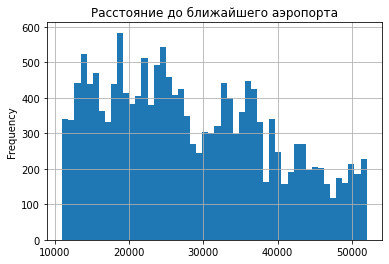

In [ ]:
data['airports_nearest'].plot(kind = 'hist', bins = 50, range = (11000,52000), title = 'Расстояние до ближайшего аэропорта', grid=True)

Квартиры чаще всего находятся не так далеко от аэропортов. Большинство - до 30000 м.

In [ ]:
#расстояние до ближайшего парка
data['parks_nearest'].quantile(0.05), data['parks_nearest'].quantile(0.95)

(94.75, 968.0)

<AxesSubplot:title={'center':'Расстояние до ближайшего парка'}, ylabel='Frequency'>

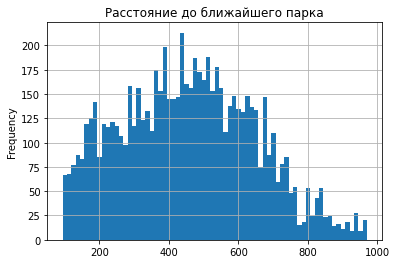

In [ ]:
data['parks_nearest'].plot(kind = 'hist', bins = 70, range = (94,970), title = 'Расстояние до ближайшего парка', grid=True)

Рядом с квартирами недалеко находятся парки. Следует пройти менее 1 км для большинства квартир.

<AxesSubplot:title={'center':'День публикации'}, ylabel='Frequency'>

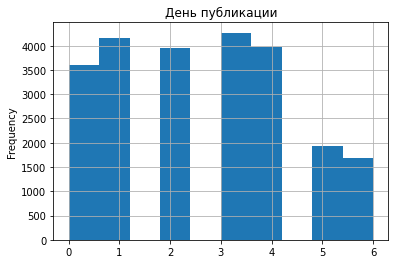

In [ ]:
#день публикации объявлений
data['day'].plot(kind = 'hist', bins = 10, range = (0,6), title = 'День публикации', grid=True)

<AxesSubplot:title={'center':'Месяц публикации'}, ylabel='Frequency'>

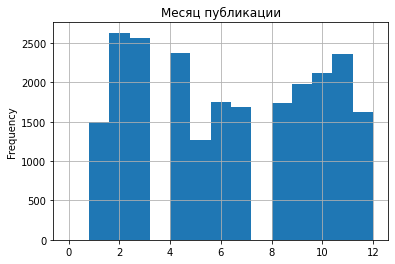

In [ ]:
#месяц публикации объявлений
data['month'].plot(kind = 'hist', bins = 15, range = (0,12), title = 'Месяц публикации', grid=True)

Чаще всего объявления выкладываются по четвергам. Месяцы, в которых чаще выкладываются объявления, это февраль и март.

2. Изучение сроков продаж квартир.

In [ ]:
data['days_exposition'].quantile(0.05), data['days_exposition'].quantile(0.95)

(9.0, 645.0)

<AxesSubplot:title={'center':'Срок размещения объявления'}, ylabel='Frequency'>

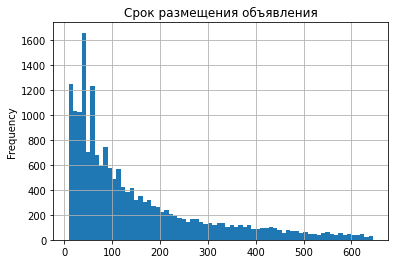

In [ ]:
data['days_exposition'].plot(kind = 'hist', bins = 70, range = (9,645), title = 'Срок размещения объявления', grid=True)

In [ ]:
print('Среднее количество дней размещения объявления:', data['days_exposition'].mean())
print('Медиана:', data['days_exposition'].median())

Среднее количество дней размещения объявления: 180.47736283099212
Медиана: 95.0


<AxesSubplot:title={'center':'Срок размещения объявления'}, ylabel='Frequency'>

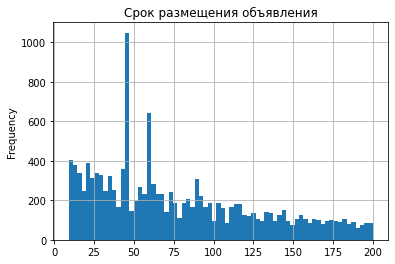

In [ ]:
data['days_exposition'].plot(kind = 'hist', bins = 70, range = (9, 200), title = 'Срок размещения объявления', grid=True)

Среднее количество дней размещения составляет 180 дней. При увеличении графика (до 200 дней) видно, что чаще всего объявления размещаются 45 или 60 дней - столько времени обычно составляет продажа. Быстрыми продажами будут сроки до этих значений, необычно долгими являются сроки от 200 дней.

3. Факторы, влияющие на стоимость объекта

Построение таблиц корреляции для исследования зависимостей. Чем ближе коэффициент корреляции Пирсона к крайним значениям 1 или -1, тем теснее линейная взаимосвязь. 

In [ ]:
data[['last_price', 'total_area', 'kitchen_area', 'rooms']].corr()

,last_price,total_area,kitchen_area,rooms
last_price,1.000000,0.644409,0.511371,0.356983
total_area,0.644409,1.000000,0.604869,0.760871
kitchen_area,0.511371,0.604869,1.000000,0.264563
rooms,0.356983,0.760871,0.264563,1.000000


Таким образом, мы видим, что есть зависимость цены от общей площади, площади кухни и количества комнат. Коэффициенты положительные, значит при изменении первой величины растет и вторая.

Самая тесная зависимость  зависимость цены от общей площади.

In [ ]:
floor_types = data.pivot_table(index = 'floor_type', values = 'last_price' , aggfunc = ('mean', 'count'))
floor_types

,count,mean
floor_type,,
другой,17377.0,6.628530e+06
первый,2906.0,4.793925e+06
последний,3302.0,7.115904e+06


In [ ]:
floor_types[['mean', 'count']].corr()

,mean,count
mean,1.000000,0.340321
count,0.340321,1.000000


Для нечислового столбца с типом этажа построена сводная таблица, в которой подсчитано количество каждого типа и определена средняя цена к ним.
Коэффициент корреляции показал, что есть зависимость цены от типа этажа. 

In [ ]:
data[['last_price', 'day', 'month', 'year']].corr()

,last_price,day,month,year
last_price,1.000000,0.001078,0.002043,-0.040586
day,0.001078,1.000000,0.011136,-0.004147
month,0.002043,0.011136,1.000000,-0.269242
year,-0.040586,-0.004147,-0.269242,1.000000


Коэффициенты корреляции от дней и месяцев, в которые были выложены объявления, близкие к нулю. Это значит, что при изменении одной величины другая остаётся прежней.
Коэффициент корреляции от года - отрицательный. Значит, рост одной величины связан с уменьшением другой.

Получается, что нет зависимости цены от даты публикации объявления.

4. Подсчет средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. 

In [ ]:
# добавление столбца с ценой за квадратный метр
data['metr_price'] = data['last_price'] / data['total_area']

In [ ]:
# выделение 10 населенных пунктов с наибольшим числом объявлений
sort_ads = (data['locality_name']
            .value_counts()
            .head(10)
)            
sort_ads

Санкт-Петербург      15632
Мурино                 588
Кудрово                472
поселок Шушары         440
Всеволожск             396
Пушкин                 367
Колпино                338
поселок Парголово      327
Гатчина                305
Выборг                 235
Name: locality_name, dtype: int64

In [ ]:
# сводная таблица с населенным пунктом и средней ценой за квадратный метр для него
top_price = data.pivot_table(index = 'locality_name', values = 'metr_price', aggfunc = 'mean').sort_values(by = 'metr_price',ascending = False)
top_price

,metr_price
locality_name,
Зеленогорск,115122.799198
Санкт-Петербург,114502.098976
поселок Репино,104238.614786
Пушкин,102777.293778
Сестрорецк,101404.946634
...,...
поселок Совхозный,12629.129129
поселок Выскатка,12335.480902
поселок Вахнова Кара,11688.311688


In [ ]:
# выделим среднюю цену за квадратный метр для 10 населенных пунктов с наибольшим количеством объявлений
# отсортируем по убыванию, чтобы узнать самую высокую и низкую стоимость квадратного метра 
top_price.join(sort_ads, on = 'locality_name', how = 'right').sort_values(by = 'metr_price', ascending = False)

,metr_price,locality_name
locality_name,,
Санкт-Петербург,114502.098976,15632
Пушкин,102777.293778,367
Кудрово,95324.930544,472
поселок Парголово,90175.913458,327
Мурино,86064.821204,588
поселок Шушары,78677.364217,440
Колпино,75424.579098,338
Гатчина,68811.372828,305
Всеволожск,68552.143144,396


Таким образом, самая высокая цена за квадратный метр в Санкт-Петербурге, она составляет 114502 рубля.

Самая низкая стоимость за квадратный метр в Выборге - 58153,5 рубля.

5. Вычисление средней цены каждого километра до центра Санкт-Петербурга. 

In [ ]:
# срез по Санкт-Петербургу
spb = data.query('locality_name == "Санкт-Петербург"')

In [ ]:
# сводная таблица со средней ценой за квадратный метр и удаленности от центра
pivot_spb = spb.pivot_table(index = 'cityCenters_nearest_km', values = 'metr_price', aggfunc = 'mean')
pivot_spb

,metr_price
cityCenters_nearest_km,
0.0,253433.411994
1.0,175127.093244
2.0,154415.306094
3.0,121044.817690
4.0,133020.703039
5.0,139892.359054
6.0,149937.940791
7.0,155989.669936
8.0,124936.721392


<AxesSubplot:title={'center':'Зависимость цены за кв.м. от удаленности от центра'}, xlabel='cityCenters_nearest_km'>

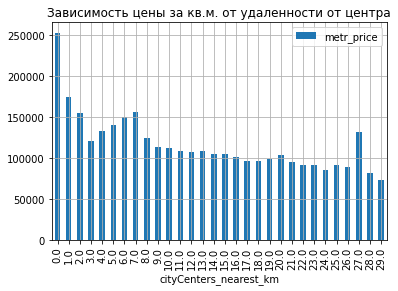

In [ ]:
pivot_spb.plot(y = 'metr_price', kind = 'bar', grid = True, title = 'Зависимость цены за кв.м. от удаленности от центра')

С увеличением удаленности от центра Санкт-Петербурга убывает цена. 
Выбросы могут говорить о приближенноси квартиры к другому объекту. Например, метро. Цена соответственно будет немного выше. 

## Итоги исследования

Перед исследованием были получены данные — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. В данных были пропуски, дубликаты и аномалии. После их предобработки все было устранено. В пункте 3 были добавлены новые столбцы необходимые для исследовательского анализа.

В ходе исследовательского анализа было выявлено, что существует зависимость цены квартиры от общей площади, площади кухни, количества комнат и типа этажа, где она находится. На стоимость квартиры не влияет день публикации объявления.
Также существует зависимость от удаленности от центра города. Рассмотрена на примере Санкт-Петербурга.

Рассмотрены также цены за квадратный метр в городах с наибольшим количеством объявлений. В Санкт-Петербурге самая высокая стоимость, когда в Выборге самая низкая.

Данные показывают норму для публикаций объявлений. И помогут своевременно выявить аномалии и предовтратить мошеннические действия.